## Réalisé par : Oukessou Soufiane 

In [ ]:
import yfinance as yf                      
import pandas as pd  

In [ ]:
import yfinance as yf
import pandas as pd
import os
import seaborn as sns

tickers = ['AAPL', 'MSFT', 'GOOGL', 'NVDA'] 
start_date = '2019-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

print("Téléchargement des données en cours...")
data = yf.download(tickers, start=start_date, end=end_date)
data.index.name = 'Date'  

Téléchargement des données en cours...


C:\Users\User\AppData\Local\Temp\ipykernel_12596\900033942.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed


In [ ]:

if 'Close' in data.columns.get_level_values(0):
    df_closing_multiindex = data['Close']
    df_closing = df_closing_multiindex.stack(level=0).reset_index()
    df_closing.columns = ['Date', 'Ticker', 'Prix_Cloture']
else:
    raise ValueError("❌ La colonne 'Close' n'existe pas dans les données téléchargées. Vérifie tes tickers ou la connexion internet.")


In [ ]:

df_closing = df_closing.sort_values(by=['Ticker', 'Date'])

df_closing['Rendement'] = df_closing.groupby('Ticker')['Prix_Cloture'].pct_change()

df_closing['SMA_50'] = df_closing.groupby('Ticker')['Prix_Cloture'].transform(
    lambda x: x.rolling(window=50).mean()
)
df_closing['SMA_200'] = df_closing.groupby('Ticker')['Prix_Cloture'].transform(
    lambda x: x.rolling(window=200).mean()
)

print("\nFeature Engineering terminé. Aperçu des données finales:")
print(df_closing.tail())


Feature Engineering terminé. Aperçu des données finales:
           Date Ticker  Prix_Cloture  Rendement      SMA_50     SMA_200
6899 2025-11-10   NVDA    199.050003   0.057933  183.928652  149.837971
6903 2025-11-11   NVDA    193.160004  -0.029591  184.376444  150.211800
6907 2025-11-12   NVDA    193.800003   0.003313  184.840237  150.535990
6911 2025-11-13   NVDA    186.860001  -0.035810  185.144430  150.851925
6915 2025-11-14   NVDA    190.169998   0.017714  185.607618  151.179661


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


chemin_bureau = os.path.join(os.path.expanduser('~'), 'Desktop', 'finance_features_final.csv')
df = pd.read_csv(chemin_bureau)


print("\nTickers disponibles :", df["Ticker"].unique())



Tickers disponibles : ['AAPL' 'GOOGL' 'MSFT' 'NVDA']


In [ ]:
df.columns

Index(['Date', 'Ticker', 'Prix_Cloture', 'Rendement', 'SMA_50', 'SMA_200'], dtype='object')

In [ ]:

df.describe()


,Prix_Cloture,Rendement,SMA_50,SMA_200
count,6872.000000,6868.000000,6676.000000,6076.000000
mean,148.708161,0.001650,147.926885,146.916642
std,112.500834,0.023314,110.468826,105.960055
min,3.173304,-0.184521,3.737169,4.082470
25%,61.662083,-0.009138,63.217602,66.268213
50%,133.195595,0.001601,132.962745,132.833394
75%,197.490360,0.012712,197.570159,190.808335
max,542.070007,0.243696,513.664602,459.732417


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6872 entries, 0 to 6871
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6872 non-null   object 
 1   Ticker        6872 non-null   object 
 2   Prix_Cloture  6872 non-null   float64
 3   Rendement     6868 non-null   float64
 4   SMA_50        6676 non-null   float64
 5   SMA_200       6076 non-null   float64
dtypes: float64(4), object(2)
memory usage: 322.3+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_12596\3736659098.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_12596\3736659098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


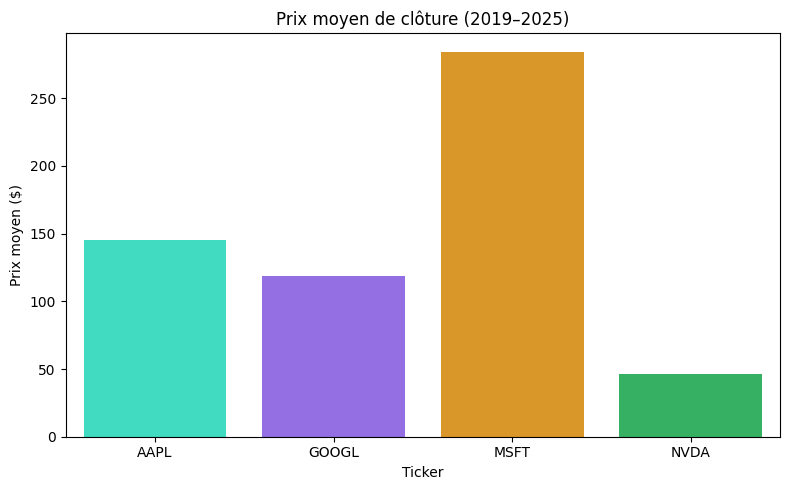

In [ ]:
couleurs = {
    'AAPL': '#27F5D3',  # turquoise
    'MSFT': '#F59E0B',  # orange doré
    'GOOGL': '#8B5CF6', # violet
    'NVDA': '#22C55E'   # vert
}

plt.figure(figsize=(8,5))
sns.barplot(
    x="Ticker", 
    y="Prix_Cloture", 
    data=df, 
    estimator="mean", 
    ci=None, 
    palette=couleurs
)
plt.title("Prix moyen de clôture (2019–2025)")
plt.ylabel("Prix moyen ($)")
plt.tight_layout()
plt.show()



Prix moyen de clôture (2019–2025):

Ce graphique à barres représente le prix moyen de clôture des actions de quatre grandes entreprises technologiques entre 2019 et 2025 : Apple (AAPL), Google (GOOGL), Microsoft (MSFT) et NVIDIA (NVDA).

Analyse et interprétation:

Microsoft (MSFT) affiche la moyenne de prix de clôture la plus élevée, traduisant une valorisation boursière stable et soutenue au cours de la période.

Apple (AAPL) et Google (GOOGL) présentent des valeurs moyennes proches, indiquant des trajectoires relativement similaires malgré des modèles économiques différents.

NVIDIA (NVDA) a la moyenne la plus faible, mais cela ne signifie pas une sous-performance : son cours est plus volatil et son prix a fortement augmenté seulement dans les dernières années.

Cette visualisation ne prend pas en compte la croissance relative (rendement), mais uniquement le niveau moyen des prix — utile pour comparer la valeur absolue des actions sur la période.


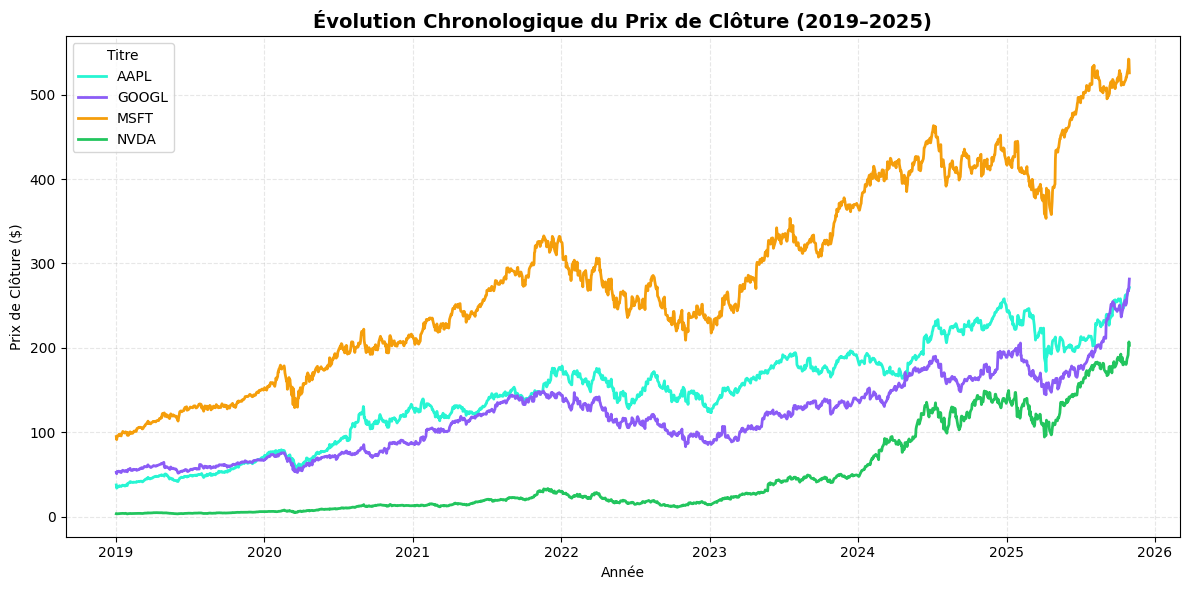

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


chemin_fichier = os.path.join(os.path.expanduser('~'), 'Desktop', 'finance_features_final.csv')
df = pd.read_csv(chemin_fichier, parse_dates=['Date'])
df = df.dropna(subset=['Prix_Cloture'])
df = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2025-12-31')]

couleurs = {
    'AAPL': '#27F5D3',  # turquoise
    'MSFT': '#F59E0B',  # orange doré
    'GOOGL': '#8B5CF6', # violet
    'NVDA': '#22C55E'   # vert
}

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='Date',
    y='Prix_Cloture',
    hue='Ticker',
    palette=couleurs,
    linewidth=2
)

plt.title("Évolution Chronologique du Prix de Clôture (2019–2025)", fontsize=14, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("Prix de Clôture ($)")
plt.legend(title="Titre", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Interprétation : Évolution Chronologique du Prix de Clôture (2019–2025)

Le graphique illustre l’évolution du prix de clôture journalier de quatre grands titres technologiques entre 2019 et 2025 : Apple (AAPL), Google (GOOGL), Microsoft (MSFT) et NVIDIA (NVDA).

On observe plusieurs tendances notables :

Microsoft (MSFT) affiche une croissance soutenue et régulière, atteignant les niveaux les plus élevés du panel, ce qui reflète une performance boursière robuste et une confiance constante des investisseurs.

Apple (AAPL) et Google (GOOGL) suivent des trajectoires comparables, avec des fluctuations liées aux cycles économiques, mais globalement une progression stable depuis 2019.

NVIDIA (NVDA), malgré un départ beaucoup plus bas, montre une forte accélération récente, traduisant l’impact de la demande en intelligence artificielle et en processeurs graphiques.

Dans l’ensemble, le marché technologique présente une tendance haussière claire sur la période, soutenue par l’innovation, la digitalisation et la résilience du secteur face aux crises.

C:\Users\User\AppData\Local\Temp\ipykernel_12596\2632233778.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


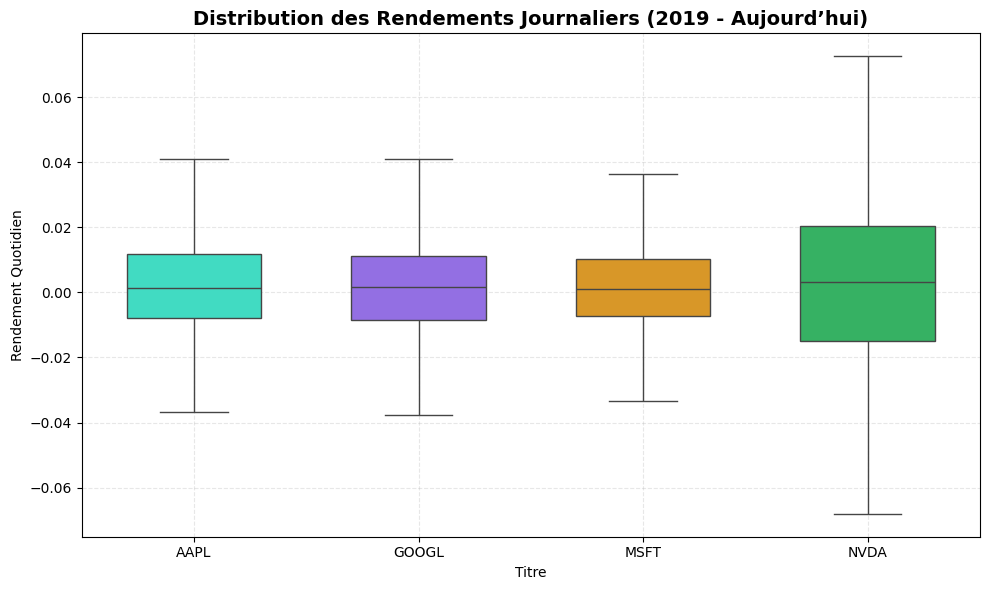

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
chemin_fichier = os.path.join(os.path.expanduser('~'), 'Desktop', 'finance_features_final.csv')
df = pd.read_csv(chemin_fichier, parse_dates=['Date'])
df = df.dropna(subset=['Rendement'])
couleurs = {
    'AAPL': '#27F5D3',  # turquoise
    'MSFT': '#F59E0B',  # orange doré
    'GOOGL': '#8B5CF6', # violet
    'NVDA': '#22C55E'   # vert
}
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Ticker',
    y='Rendement',
    palette=couleurs,
    width=0.6,
    showfliers=False  
)
plt.title("Distribution des Rendements Journaliers (2019 - Aujourd’hui)", fontsize=14, fontweight='bold')
plt.xlabel("Titre")
plt.ylabel("Rendement Quotidien")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Distribution des rendements journaliers


Ce boxplot présente la variabilité des rendements quotidiens de quatre grandes entreprises technologiques — Apple (AAPL), Google (GOOGL), Microsoft (MSFT) et NVIDIA (NVDA) — sur la période 2019 à aujourd’hui.

 Lecture du graphique

L’axe vertical représente le rendement quotidien (en proportion), c’est-à-dire la variation relative du prix d’un jour à l’autre.

Chaque boîte illustre la dispersion des rendements :

la ligne au centre = la médiane (rendement typique du titre)

la boîte = les 50 % des valeurs centrales

les extrémités = les rendements plus extrêmes (volatilité)

 Analyse et interprétation

NVIDIA (NVDA) se distingue par une volatilité nettement plus élevée : sa boîte est plus étendue et ses rendements varient davantage. Cela reflète son profil de croissance rapide mais risqué.

Microsoft (MSFT) montre au contraire une dispersion plus faible, traduisant une stabilité boursière et un risque plus maîtrisé.

Apple (AAPL) et Google (GOOGL) se situent entre les deux extrêmes : elles affichent des rendements équilibrés, ni trop volatils ni trop constants.

Les médianes proches de zéro indiquent que, sur le long terme, les rendements positifs et négatifs se compensent, ce qui est typique d’un comportement de marché efficient.

 Insights typiques :

Si une boîte est plus haute et plus fine, le titre est stable (faible volatilité).

Si une boîte est large, cela indique une forte volatilité → le prix varie beaucoup chaque jour.

Comparer les positions des médianes permet de voir quel titre a eu la meilleure performance moyenne sur la période.


 À retenir

NVIDIA : rendement potentiellement élevé, mais risque fort (valeur spéculative).

Microsoft : stabilité et performance constante (valeur défensive).

Apple / Google : profils intermédiaires, bons compromis entre rendement et risque.

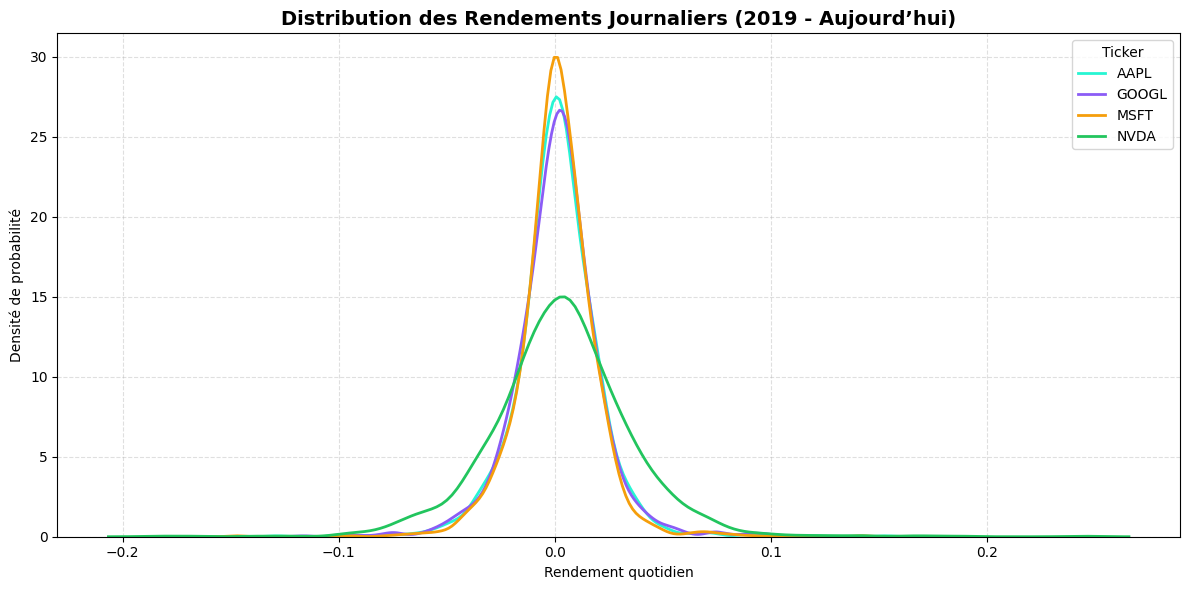

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

chemin_fichier = os.path.join(os.path.expanduser('~'), 'Desktop', 'finance_features_final.csv')
df = pd.read_csv(chemin_fichier, parse_dates=['Date'])

couleurs = {
    'AAPL': '#27F5D3',  # turquoise
    'MSFT': '#F59E0B',  # orange doré
    'GOOGL': '#8B5CF6', # violet
    'NVDA': '#22C55E'   # vert
}

plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    sns.kdeplot(subset['Rendement'].dropna(), 
                label=ticker, 
                color=couleurs.get(ticker, 'gray'), 
                linewidth=2)

plt.title("Distribution des Rendements Journaliers (2019 - Aujourd’hui)", fontsize=14, fontweight='bold')
plt.xlabel("Rendement quotidien")
plt.ylabel("Densité de probabilité")
plt.legend(title="Ticker")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Distribution des rendements journaliers

Ce graphique montre la **distribution de la rentabilité quotidienne** pour chaque action.  
- L’axe des abscisses (x) indique le **rendement journalier** (en pourcentage de variation du prix de clôture).  
- L’axe des ordonnées (y) indique la **densité de probabilité**, c’est-à-dire la fréquence relative de ces rendements.

 **Analyse / Insights :**
- Les courbes centrées autour de 0 montrent que la plupart des jours, le rendement est faible (proche de zéro).  
- Une courbe plus **étalée** (comme NVDA en vert) indique une action **plus volatile**, donc plus risquée.  
- Une courbe plus **fine et resserrée** (comme MSFT) montre une action **plus stable**.  
- Si une courbe est légèrement décalée à droite, cela signifie que l’action a une **tendance haussière** sur la période.

Ce type de graphique est essentiel pour comparer la **volatilité et la stabilité** entre différentes actions.


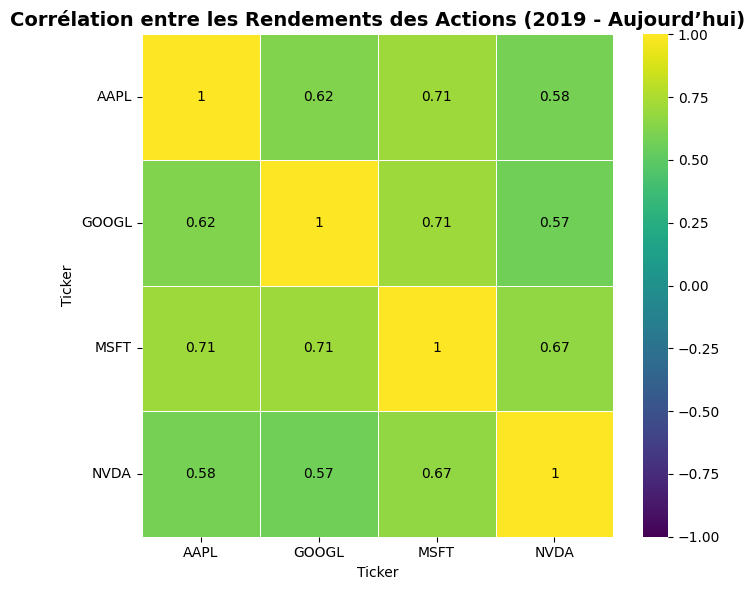

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

chemin_fichier = os.path.join(os.path.expanduser('~'), 'Desktop', 'finance_features_final.csv')
df = pd.read_csv(chemin_fichier, parse_dates=['Date'])
df = df.dropna(subset=['Rendement'])
pivot_df = df.pivot(index='Date', columns='Ticker', values='Rendement')
corr_matrix = pivot_df.corr()

couleur_principale = '#27F5D3'  # turquoise
couleur_fond = 'white'        # bleu foncé
couleur_texte = 'black'

plt.figure(figsize=(7, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='viridis',
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"color": couleur_texte}
)
plt.title("Corrélation entre les Rendements des Actions (2019 - Aujourd’hui)", fontsize=14, fontweight='bold', color=couleur_texte)
plt.xticks(color=couleur_texte)
plt.yticks(color=couleur_texte, rotation=0)
plt.gcf().patch.set_facecolor(couleur_fond)
plt.tight_layout()
plt.show()

 Corrélation entre les rendements:

Ce graphique présente la matrice de corrélation entre les rendements des actions :

Les valeurs proches de +1 indiquent une forte corrélation positive → les actions évoluent dans le même sens.

Les valeurs proches de 0 → pas de lien direct entre les variations.

Les valeurs négatives → les titres évoluent en sens opposé.

 Insights typiques :

Les grandes entreprises technologiques (AAPL, MSFT, GOOGL, NVDA) présentent généralement une corrélation positive élevée : elles sont influencées par des facteurs de marché similaires (innovation, taux d’intérêt, etc.).

Une corrélation très forte (> 0.8) signifie qu’ajouter les deux titres dans un même portefeuille n’apporte pas beaucoup de diversification.

À l’inverse, une corrélation plus faible (ex. 0.5 ou moins) permet une meilleure diversification du risque.

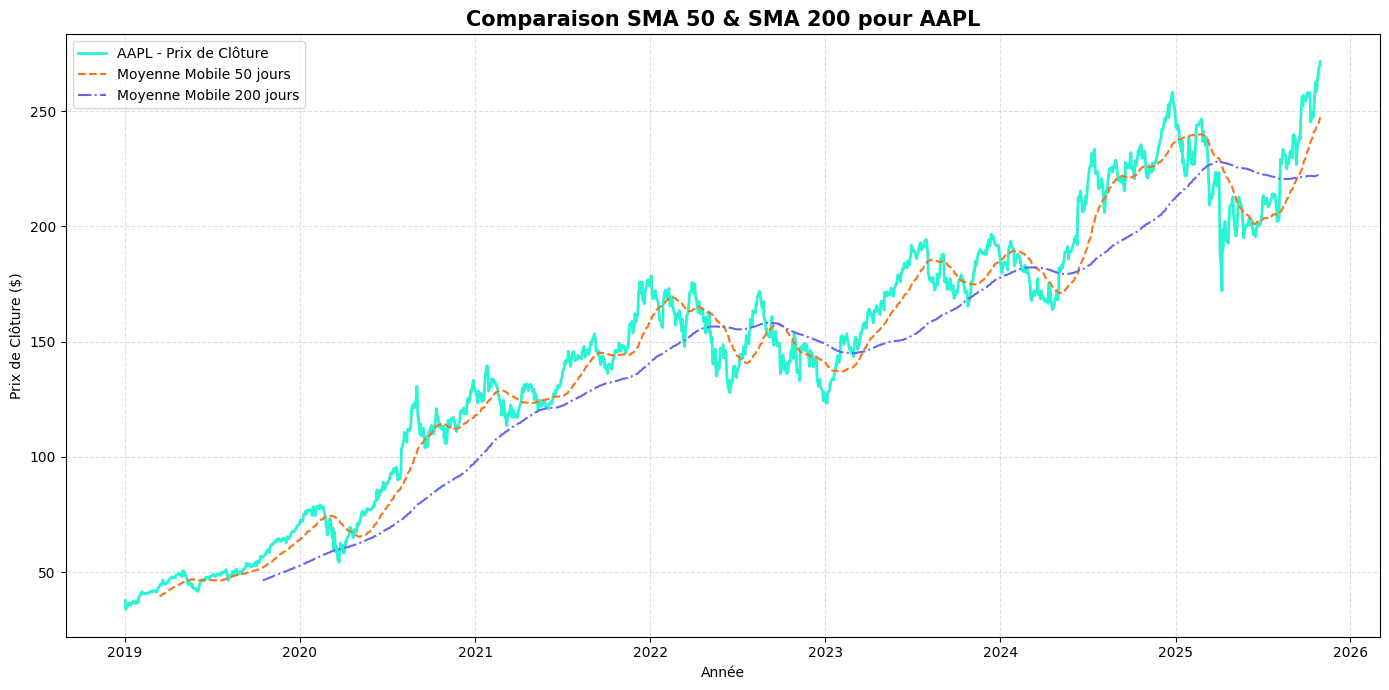

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

chemin_fichier = os.path.join(os.path.expanduser('~'), 'Desktop', 'finance_features_final.csv')
df = pd.read_csv(chemin_fichier, parse_dates=['Date'])

couleurs = {
    'AAPL': '#27F5D3',  # turquoise
    'MSFT': '#F59E0B',  # orange doré
    'GOOGL': '#8B5CF6', # violet
    'NVDA': '#22C55E'   # vert
}

plt.figure(figsize=(14, 7))

ticker = 'AAPL'
subset = df[df['Ticker'] == ticker]

plt.plot(subset['Date'], subset['Prix_Cloture'], label=f'{ticker} - Prix de Clôture', color=couleurs[ticker], linewidth=2)
plt.plot(subset['Date'], subset['SMA_50'], label='Moyenne Mobile 50 jours', color='#F97316', linestyle='--', linewidth=1.5)
plt.plot(subset['Date'], subset['SMA_200'], label='Moyenne Mobile 200 jours', color='#6366F1', linestyle='-.', linewidth=1.5)

plt.title(f"Comparaison SMA 50 & SMA 200 pour {ticker}", fontsize=15, fontweight='bold')
plt.xlabel("Année")
plt.ylabel("Prix de Clôture ($)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Comparaison des Moyennes Mobiles (SMA 50 et SMA 200):

Ce graphique illustre les **tendances à moyen et long terme** du cours de l’action **AAPL** :

- La **courbe turquoise** montre le **prix de clôture réel**.  
- La **courbe orange en pointillés** représente la **moyenne mobile sur 50 jours (SMA50)** : elle capte les tendances de court/moyen terme.  
- La **courbe violette en tirets** représente la **moyenne mobile sur 200 jours (SMA200)** : elle reflète les tendances à long terme.

 **Analyse / Insights :**
- Lorsque la **SMA50 dépasse la SMA200 vers le haut**, cela indique un **signal haussier** (souvent appelé *Golden Cross*).  
- À l’inverse, quand la **SMA50 passe sous la SMA200**, c’est un **signal baissier** (*Death Cross*).  
- Ces croisements sont souvent utilisés par les analystes pour anticiper les changements de tendance.




C:\Users\User\AppData\Local\Temp\ipykernel_12596\2684332868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


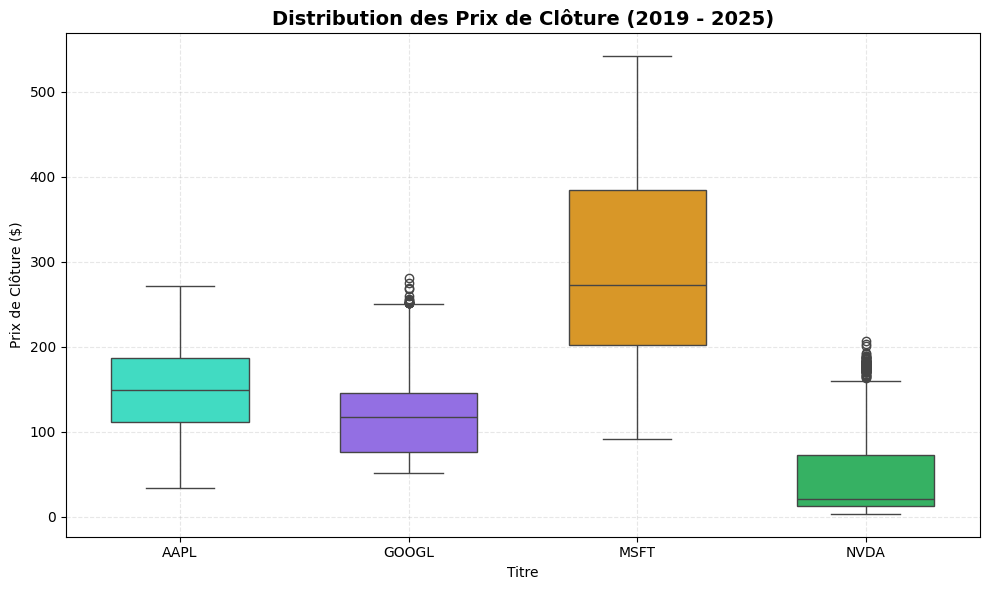

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

chemin_fichier = os.path.join(os.path.expanduser('~'), 'Desktop', 'finance_features_final.csv')
df = pd.read_csv(chemin_fichier, parse_dates=['Date'])

df = df.dropna(subset=['Prix_Cloture'])

couleurs = {
    'AAPL': '#27F5D3',  # turquoise
    'MSFT': '#F59E0B',  # orange doré
    'GOOGL': '#8B5CF6', # violet
    'NVDA': '#22C55E'   # vert
}

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Ticker',
    y='Prix_Cloture',
    palette=couleurs,
    width=0.6,
    showfliers=True  
)
plt.title("Distribution des Prix de Clôture (2019 - 2025)", fontsize=14, fontweight='bold')
plt.xlabel("Titre")
plt.ylabel("Prix de Clôture ($)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Analyse : Distribution des Prix de Clôture (2019 – 2025)

Ce boxplot met en évidence la dispersion des prix de clôture pour les principales actions technologiques entre 2019 et 2025.

Microsoft (MSFT) présente la médiane la plus élevée, confirmant sa domination en termes de valorisation boursière. Sa boîte est large, ce qui traduit une forte amplitude des prix, probablement due à une croissance soutenue et à une volatilité modérée.

Apple (AAPL) et Google (GOOGL) montrent des distributions similaires, avec des médianes proches et une dispersion plus contenue : leurs trajectoires boursières sont plus stables.

NVIDIA (NVDA) affiche une distribution très étendue, marquée par de nombreux points extrêmes (outliers). Cela traduit une forte volatilité, typique d’un secteur en forte expansion comme celui des semi-conducteurs et de l’intelligence artificielle.

En résumé, le boxplot illustre les écarts de valorisation entre les géants technologiques et la différence de volatilité entre des titres matures (MSFT, AAPL) et des titres à forte croissance (NVDA)